In [1]:
import matplotlib.pyplot as plt
import json
import matplotlib.patches as mpatches

In [2]:
langs = [
    "eng", 
    "spa",
    "ita",
    "fra",
    "hun",
    "spa", 
    "mon"
]

colors = [
    "red", 
    "blue", 
    "green", 
    "yellow", 
    "pink", 
    "brown", 
    "orange"
]

markers = [
    
]


In [3]:
def readLang(str):
    categories = {}
    with open(str) as f:
        for line in f.readlines():
            line = line.split("\t")
            if line[2].strip() not in categories:
                categories[line[2].strip()] = 0
            else:
                categories[line[2].strip()] += 1
    
    categories["all"] = sum(categories.values())

    return categories

Figure(1440x2160)


/home/chinbat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Legend does not support 'eng' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


<Figure size 1440x1080 with 0 Axes>

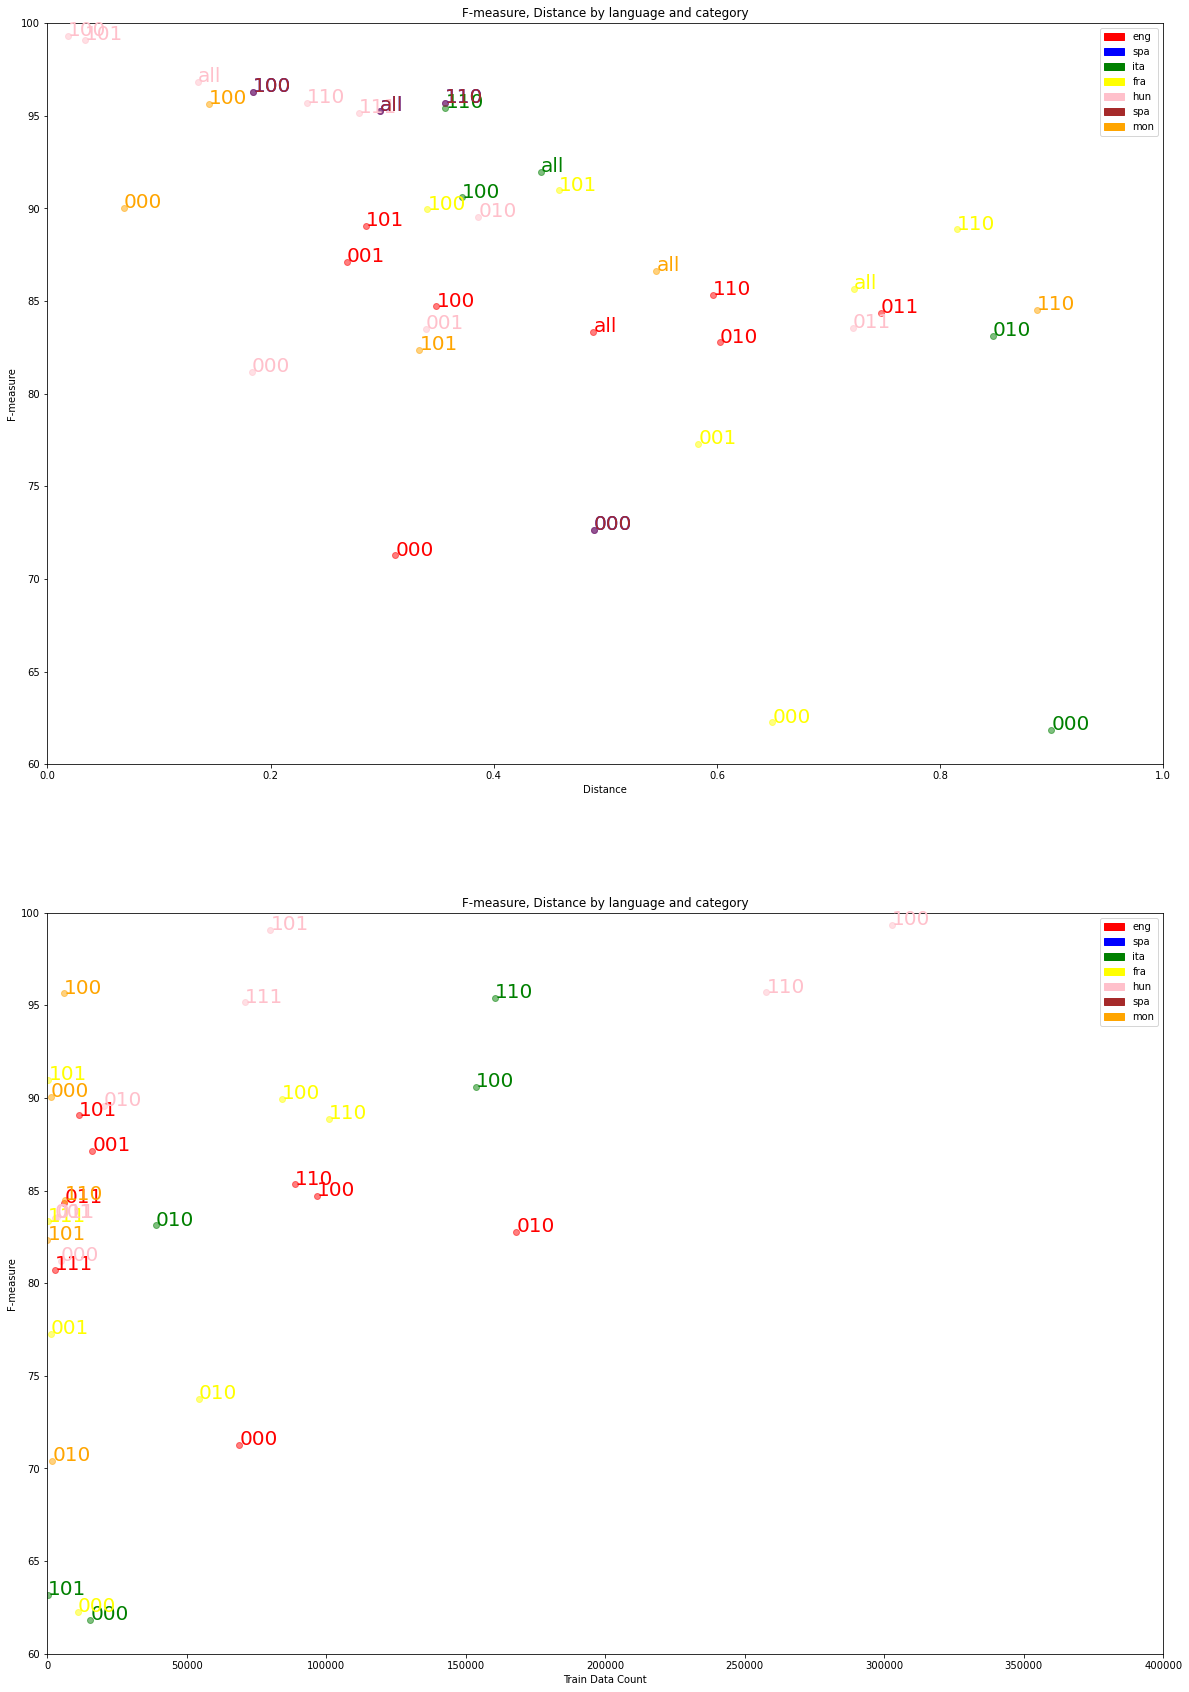

In [4]:
fig = plt.figure(figsize=(20, 15))
fig, axs = plt.subplots(2)
fig.set_figwidth(20)
fig.set_figheight(30)

print(fig)
for ind, lang in enumerate(langs):    
    axs[0].set_title("F-measure, Distance by language and category")
    axs[0].set_xlabel("Distance")
    axs[0].set_ylabel("F-measure")

    axs[1].set_title("F-measure, Distance by language and category")
    axs[1].set_xlabel("Train Data Count")
    axs[1].set_ylabel("F-measure")

    axs[0].axis([0, 1, 60, 100])
    axs[1].axis([0, 400000, 60, 100])
    datafile = open(f"transformer/resultjson/{lang}.json", "r")
    data = json.load(datafile)
    if lang != "spa":
        categories = readLang(f"data/{lang}.word.train.tsv")

    for stat in data:
        axs[0].scatter(x=stat["distance"], y=stat["f_measure"], color=colors[ind], alpha=0.5)
        axs[0].annotate(stat["category"], xy=(stat["distance"], stat["f_measure"]), fontsize=20, color=colors[ind])
        if lang != "spa" and stat["category"] != "all":
            axs[1].scatter(x=categories[stat["category"]], y=stat["f_measure"], color=colors[ind], alpha=0.5)
            axs[1].annotate(stat["category"], xy=(categories[stat["category"]], stat["f_measure"]), fontsize=20, color=colors[ind])

    axs[0].legend(langs, "1")

fake_handles = [mpatches.Patch(color=item) for item in colors]
label = langs
axs[0].legend(fake_handles, label, loc='upper right', prop={'size': 10})
axs[1].legend(fake_handles, label, loc='upper right', prop={'size': 10})
plt.show()

: 